In [1]:
import os

In [2]:
root = r"X:\doc_layout_analysis\D4LA"
images_dir = os.path.join(root, 'images')
labels_dir = os.path.join(root, 'labels')

In [3]:
id2label = {
    0: 'title', 
    1: 'plain text',
    2: 'abandon', 
    3: 'figure', 
    4: 'figure_caption', 
    5: 'table', 
    6: 'table_caption', 
    7: 'table_footnote', 
    8: 'isolate_formula', 
    9: 'formula_caption'
}

In [15]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
def visualize(img, anns):


    img = cv2.imread(img)
    for ann in anns:
        cls, x1, y1, x2, y2, x3, y3, x4, y4 = ann
        x1 = int(float(x1)*img.shape[1])
        y1 = int(float(y1)*img.shape[0])
        x2 = int(float(x2)*img.shape[1])
        y2 = int(float(y2)*img.shape[0])
        x3 = int(float(x3)*img.shape[1])
        y3 = int(float(y3)*img.shape[0])
        x4 = int(float(x4)*img.shape[1])
        y4 = int(float(y4)*img.shape[0])
        
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.line(img, (x2, y2), (x3, y3), (0, 255, 0), 2)
        cv2.line(img, (x3, y3), (x4, y4), (0, 255, 0), 2)
        cv2.line(img, (x4, y4), (x1, y1), (0, 255, 0), 2)
        cv2.putText(img, cls, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    return img



def read_annotations(label):
    with open(label, "r") as f:
        lines = f.readlines()
    anns = []
    for line in lines:
        cls, x1, y1, x2, y2, x3, y3, x4, y4 = line.strip().split()
        anns.append((cls, x1, y1, x2, y2, x3, y3, x4, y4))
    return anns


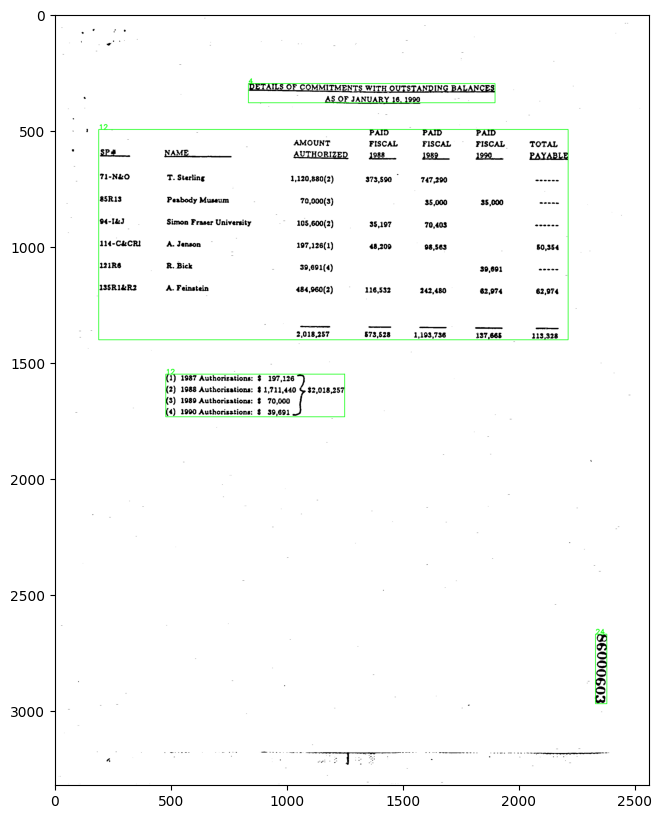

In [17]:
from pathlib import Path
seed = 598
img = os.path.join(images_dir, os.listdir(images_dir)[seed])
label = os.path.join(labels_dir, Path(img).stem + '.txt')
img = visualize(img, read_annotations(label))

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()